<a href="https://colab.research.google.com/github/Brenton237/Data-Analysis-Exercise-with-Python/blob/main/Data_Analysis_Exercise_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
cd MyDrive/

/gdrive/MyDrive


In [ ]:
cd Turing.com\ project 

/gdrive/MyDrive/Turing.com project


Preliminary Data Analysis

i) Initialize Environments

In [ ]:
# Required modules
import pandas as pd
import numpy as np
# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df1 = pd.read_csv('cardio_alco.csv', sep = ';')
df2 = pd.read_csv('cardio_base.csv')
df3 = pd.read_csv('covid_data.csv')

df1.head()


,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [ ]:
df2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [ ]:
df3.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


Creates an id column from 0 - length of df3

In [ ]:
df3['id'] = range(0, len(df3))
df3.set_index('id')
#df3.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
id,,,,,,,,
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN


In [ ]:
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      56903 non-null  int64
 1   alco    56903 non-null  int64
dtypes: int64(2)
memory usage: 889.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (to

In [ ]:
#df1.shape
#df2.shape
df3.shape

(23082, 9)

Total Male

In [ ]:
male = df2[df2["gender"] == 2]
total_male = len(male)
total_male

24470

Total Female

In [ ]:
female = df2[df2["gender"] == 1]
total_female = len(female)
total_female

45530

Merge df1 and df2 to form dfa

In [ ]:
dfa = pd.merge(df1, df2, on = 'id')
dfa.head()

,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,44,0,14605,1,159,60.0,110,70,1,0
1,45,0,20652,1,160,73.0,130,85,1,0
2,46,0,21940,2,173,82.0,140,90,3,0
3,47,0,20404,1,163,55.0,120,80,1,0
4,49,0,18328,2,175,95.0,120,80,1,0


Merge dfa to df3 to form dfa

In [ ]:
dfa = pd.merge(dfa , df3, on= 'id')
dfa.head()

,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,44,0,14605,1,159,60.0,110,70,1,0,Afghanistan,2020-02-13,0,0,38928341.0,2.581,1803.987,0.5
1,45,0,20652,1,160,73.0,130,85,1,0,Afghanistan,2020-02-14,0,0,38928341.0,2.581,1803.987,0.5
2,46,0,21940,2,173,82.0,140,90,3,0,Afghanistan,2020-02-15,0,0,38928341.0,2.581,1803.987,0.5
3,47,0,20404,1,163,55.0,120,80,1,0,Afghanistan,2020-02-16,0,0,38928341.0,2.581,1803.987,0.5
4,49,0,18328,2,175,95.0,120,80,1,0,Afghanistan,2020-02-18,0,0,38928341.0,2.581,1803.987,0.5


Let’s convert the data into long format and depict the value counts of the categorical features using factorplot().

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


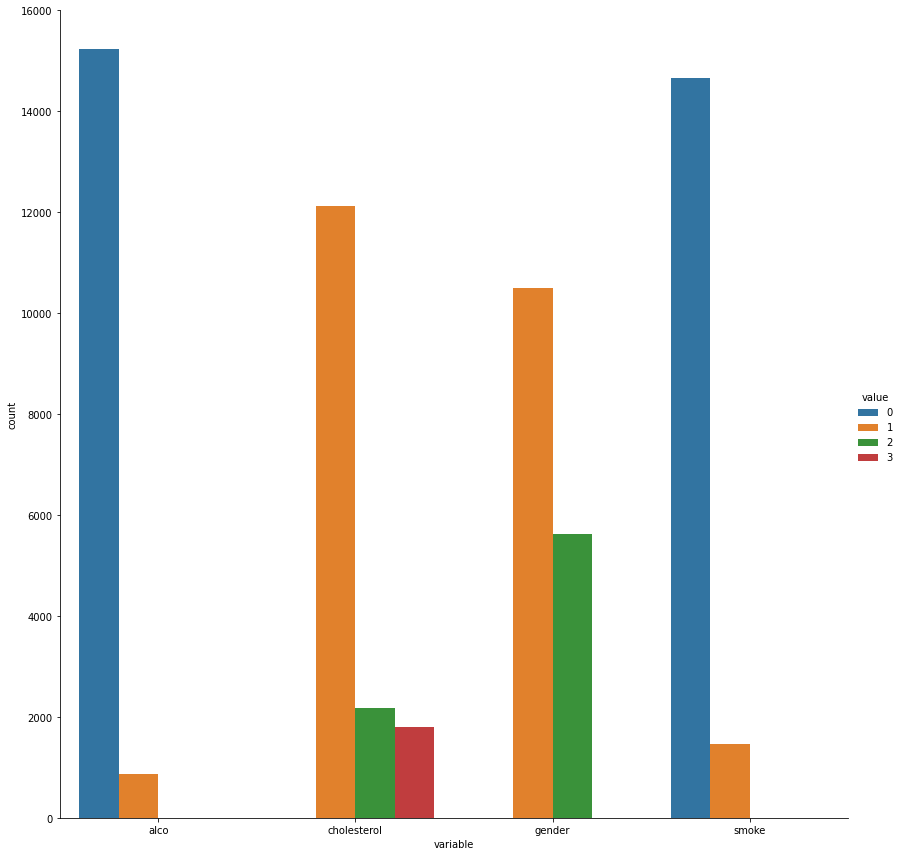

In [ ]:
df_uniques = pd.melt(
    frame=dfa,
    value_vars=["gender", "cholesterol", "smoke", "alco"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.factorplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar", size=12
);

Statistics for the feature unique values:

In [ ]:
for c in dfa.columns:
    n = dfa[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(dfa[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
16107
----------
alco
2 [(0, 15242), (1, 865)]
----------
age
6208
----------
gender
2 [(1, 10492), (2, 5615)]
----------
height
80
----------
weight
164
----------
ap_hi
107
----------
ap_lo
96
----------
cholesterol
3 [(1, 12122), (2, 2182), (3, 1803)]
----------
smoke
2 [(0, 14654), (1, 1453)]
----------
location
212
----------
date
163
----------
new_cases
1678
----------
new_deaths
508
----------
population
211
----------
aged_65_older_percent
183
----------
gdp_per_capita
184
----------
hospital_beds_per_thousand
100
----------


Minimum age

In [ ]:
min_age = round(dfa['age'].min()/365.25)
min_age

30

In [ ]:
dfa.groupby('gender')['age'].mean()/365.25

gender
1    53.388448
2    53.111151
Name: age, dtype: float64

Average weight

In [ ]:
ave_weight = round(dfa['weight'].mean())
ave_weight

74

Average weight for men and women  

In [ ]:
dfa.groupby('gender')['weight'].mean()

gender
1    72.668404
2    77.246625
Name: weight, dtype: float64

Average age of people with weight >= 74kg

In [ ]:
high = round(dfa.loc[dfa['weight'] >= 74, 'age'].mean()/365.25)
high

54

% difference btw age group of heavier people to not heavier people

In [ ]:
perc_difference = round(100 * (dfa.loc[dfa['weight'] > 74, 'age'].mean() - dfa.loc[dfa['weight'] < 74, 'age'].mean())/ 365.25)
perc_difference

67

Total Population

In [ ]:
dfa["population"].sum()

1676109787055.0

sum of value counts of all locations

In [ ]:
dfa['location'].value_counts().sum()

16107

Most frequent Location

In [ ]:
dfa['location'].mode()

0    Iran
dtype: object

In [ ]:
dfa.groupby('location')['population'].mean()

location
Afghanistan       3.892834e+07
Albania           2.877800e+06
Algeria           4.385104e+07
Andorra           7.726500e+04
Angola            3.286627e+07
                      ...     
Western Sahara    5.973300e+05
World             7.794799e+09
Yemen             2.982597e+07
Zambia            1.838396e+07
Zimbabwe          1.486293e+07
Name: population, Length: 212, dtype: float64

Propotion of Iranian citizens

In [ ]:
float((dfa['location'] == "Iran").sum())

123.0

Mean of German citizens

In [ ]:
count_germany = dfa['location'] == 'Germany'
count_germany.mean()

0.0070155832867697275

Statistics for ages of each gender in  all locations 

In [ ]:
for (location, gender), sub_dfa in dfa.groupby(["location", "gender"]):
    print("location: {0}, gender: {1}".format(location, gender))
    print((sub_dfa["age"]/365.25).describe())

location: Afghanistan, gender: 1
count    48.000000
mean     53.397958
std       6.325088
min      39.718001
25%      49.792608
50%      53.561944
75%      58.165640
max      64.583162
Name: age, dtype: float64
location: Afghanistan, gender: 2
count    34.000000
mean     53.167210
std       7.130504
min      39.556468
25%      49.768652
50%      54.747433
75%      58.566051
max      64.032854
Name: age, dtype: float64
location: Albania, gender: 1
count    30.000000
mean     52.549304
std       5.886676
min      39.679671
25%      49.202601
50%      51.089665
75%      58.836413
max      61.404517
Name: age, dtype: float64
location: Albania, gender: 2
count    21.000000
mean     56.147192
std       6.611053
min      39.208761
25%      53.815195
50%      56.216290
75%      60.197125
max      64.257358
Name: age, dtype: float64
location: Algeria, gender: 1
count    67.000000
mean     53.867255
std       6.480200
min      39.351129
25%      50.057495
50%      54.288843
75%      58.507871
ma

Max Population

In [ ]:
dfa["population"].max()

7794798729.0

Average Population

In [ ]:
dfa["population"].mean()

104339503.67623258

Finds index for which condition is fulfilled

In [ ]:
dfa.loc[dfa["population"] == 7794798729.0]["location"].index[0]

15950

Using index it finds info for specific row

In [ ]:
dfa.loc[15950]

id                                   22855
alco                                     0
age                                  21337
gender                                   2
height                                 172
weight                               100.0
ap_hi                                  150
ap_lo                                   80
cholesterol                              1
smoke                                    0
location                             World
date                            2019-12-31
new_cases                               27
new_deaths                               0
population                    7794798729.0
aged_65_older_percent                8.696
gdp_per_capita                   15469.207
hospital_beds_per_thousand           2.705
Name: 15950, dtype: object

In [ ]:
id = dfa.loc[dfa["location"] == "Iran"]["population"].index[0]
dfa.loc[id].at['population']

83992953.0

In [ ]:
dfa["location"].mode()

0    Iran
dtype: object

Average age based on gender

In [ ]:
dfa.groupby('gender')['age'].mean() / 365.25

gender
1    53.388448
2    53.111151
Name: age, dtype: float64

Average height based on gender

In [ ]:
dfa.groupby('gender')['height'].mean()

gender
1    161.388677
2    169.991095
Name: height, dtype: float64

Average Alcohol consumption based on gender

In [ ]:
dfa.groupby('gender')['alco'].mean()

gender
1    0.025543
2    0.106322
Name: alco, dtype: float64

Average smoking based on gender

In [ ]:
dfa.groupby('gender')['smoke'].mean()

gender
1    0.021636
2    0.218344
Name: smoke, dtype: float64

%male smokers - %female smokers

In [ ]:
round(100 * (dfa.loc[dfa['gender'] == 2, 'smoke'].mean() - dfa.loc[dfa['gender'] == 1, 'smoke'].mean()))

20

Average age based on smoking

In [ ]:
dfa.groupby('smoke')['age'].median() / 365.25

smoke
0    54.001369
1    52.413415
Name: age, dtype: float64

difference between median age of smokers and non smokers

In [ ]:
round((dfa[dfa['smoke'] == 0]['age'].median() - dfa[dfa['smoke'] == 1]['age'].median()) / 365.25 * 12)

19

In [ ]:
dfa['age_years'] = (dfa['age'] / 365.25).round().astype('int')
dfa['age_years'].max()

65

In [ ]:
smoking_old_men = dfa[(dfa['gender'] == 2) & (dfa['age_years'] >= 60)
                    & (dfa['age_years'] < 65) & (dfa['smoke'] == 1)]

smoking_old_men[(smoking_old_men['cholesterol'] == 1) &
               (smoking_old_men['ap_hi'] < 120)].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


id                            9.398810e+03
alco                          9.523810e-02
age                           2.249457e+04
gender                        2.000000e+00
height                        1.700476e+02
weight                        6.680952e+01
ap_hi                         1.024762e+02
ap_lo                         7.190476e+01
cholesterol                   1.000000e+00
smoke                         1.000000e+00
new_cases                     1.555952e+03
new_deaths                    7.809524e+01
population                    1.073667e+08
aged_65_older_percent         9.738000e+00
gdp_per_capita                2.218443e+04
hospital_beds_per_thousand    2.921882e+00
age_years                     6.166667e+01
dtype: float64

BMI (Body Mass Index). To do this, divide weight in kilograms by the square of height in meters. Normal BMI values are said to be from 18.5 to 25.

In [ ]:
dfa['BMI'] = dfa['weight'] / (dfa['height'] / 100) ** 2
dfa['BMI'].median()

26.397977394408095

In [ ]:
dfa.groupby('gender')['BMI'].median()

gender
1    26.813590
2    25.880571
Name: BMI, dtype: float64

In [ ]:
dfa.groupby(['gender', 'alco','cholesterol'])['BMI'].median().to_frame()

BMI
gender alco cholesterol           
1      0    1            26.078972
            2            28.196921
            3            28.981143
       1    1            27.942143
            2            30.110991
            3            31.249382
2      0    1            25.510204
            2            27.173102
            3            27.144200
       1    1            25.904310
            2            27.997849
            3            27.509733

We can notice, that the data is not perfect. It contains much of “dirt” and inaccuracies. We’ll see it better when we do data visualization.

Filter out the following patient segments (that we consider to have erroneous data)

diastolic pressure is higher than systolic.

height is strictly less than 2.5%-percentile (use pd.Series.quantile)

height is strictly more than 97.5%-percentile

weight is strictly less then 2.5%-percentile

weight is strictly more than 97.5%-percentile

This is not all we can do to clean the data, but let’s stop here by now.

In [ ]:
filtered_df = dfa[(dfa['ap_lo'] <= dfa['ap_hi']) & 
                 (dfa['height'] >= dfa['height'].quantile(0.025)) &
                 (dfa['height'] <= dfa['height'].quantile(0.975)) &
                 (dfa['weight'] >= dfa['weight'].quantile(0.025)) & 
                 (dfa['weight'] <= dfa['weight'].quantile(0.975))]
print(filtered_df.shape[0] / dfa.shape[0])

0.9003538834047309


Pearson's Correlation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


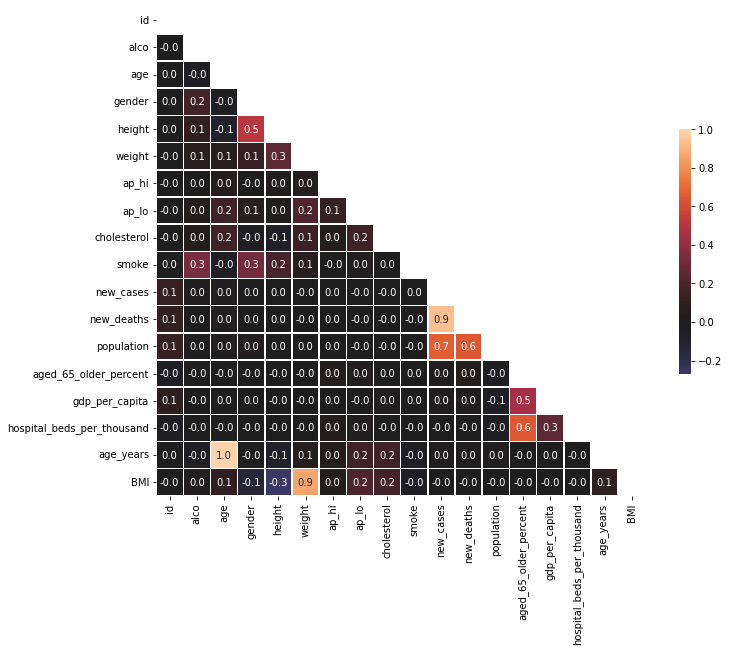

In [ ]:
# Calculate the correlation matrix
df = filtered_df.copy()

corr = df.corr(method='pearson')

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Spearman's Correlation

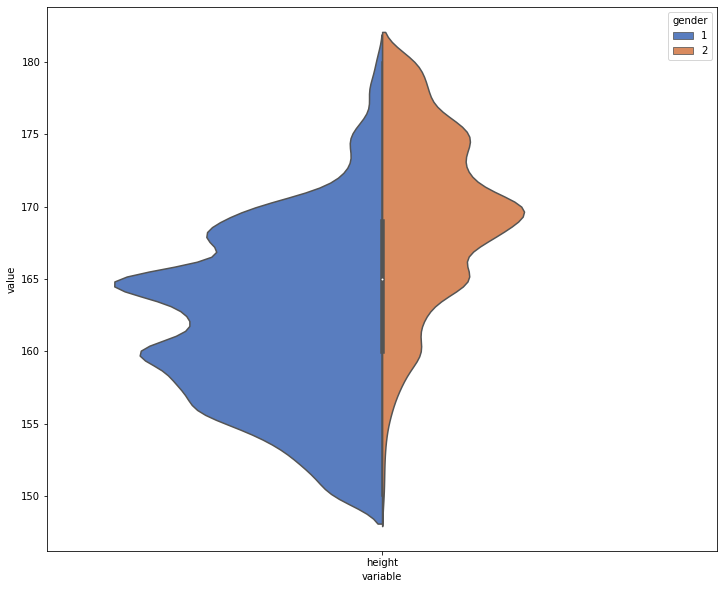

In [ ]:
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])

plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    palette="muted", 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False
)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


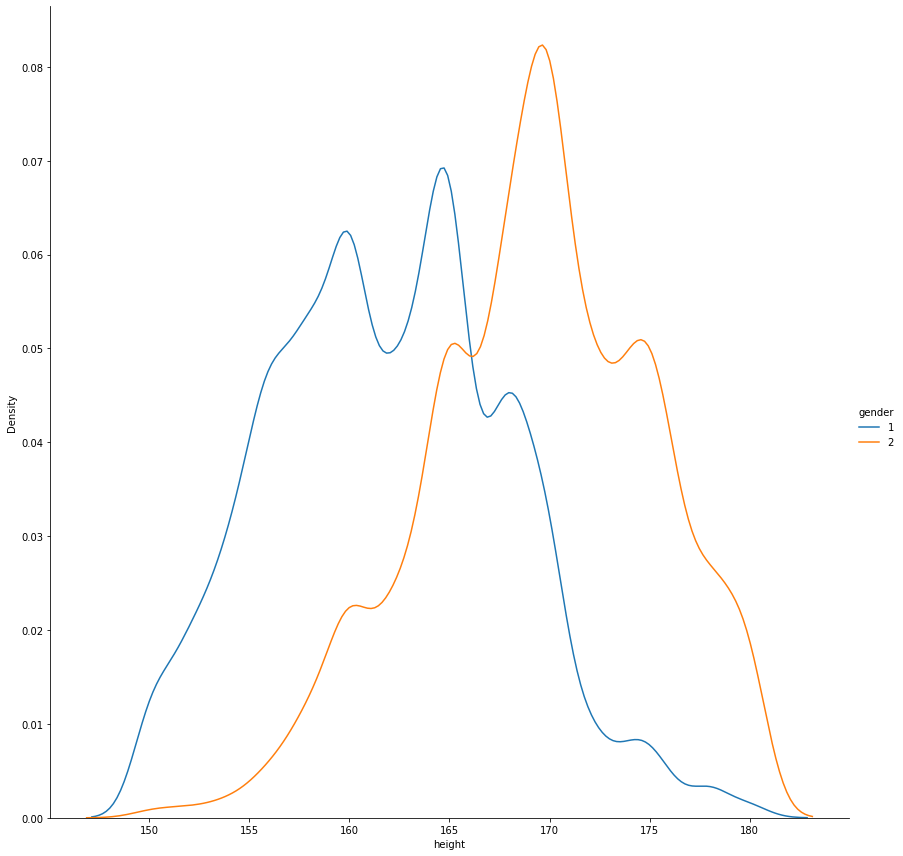

In [ ]:
sns.FacetGrid(df, hue="gender", size=12) \
   .map(sns.kdeplot, "height").add_legend();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


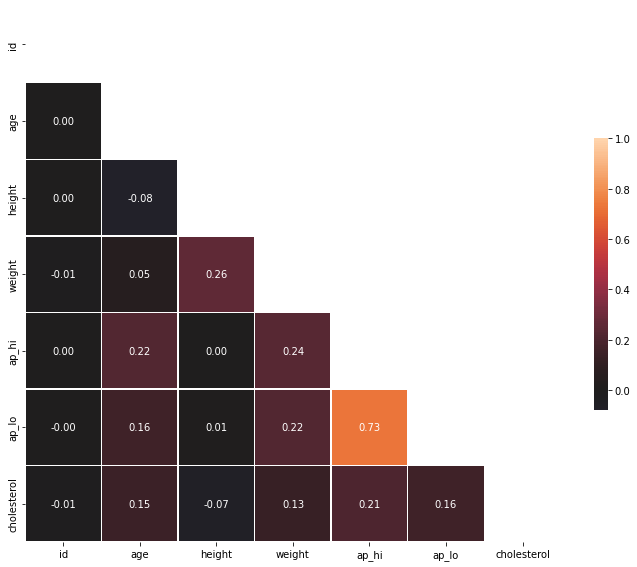

In [ ]:
# Calculate the correlation matrix
corr = df[['id', 'age', 'height', 'weight', 
           'ap_hi', 'ap_lo', 'cholesterol']].corr(method='spearman')

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap using the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

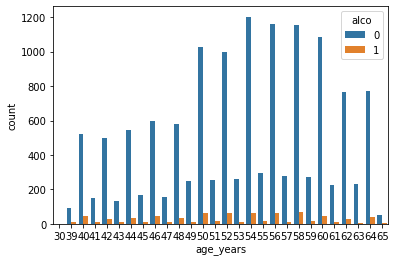

In [ ]:
sns.countplot(x="age_years", hue='alco', data=df);